In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
dataset = pd.read_csv('/datasets/height-weight.csv')
df = dataset
dataset.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


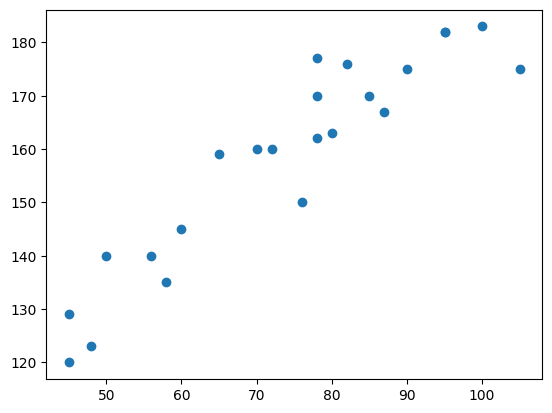

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.show()

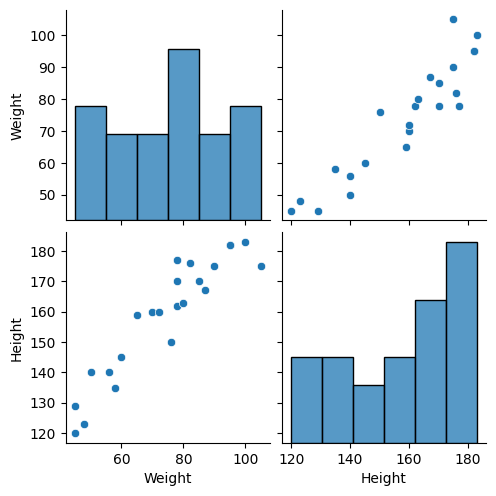

In [4]:
sns.pairplot(df)

<Axes: >

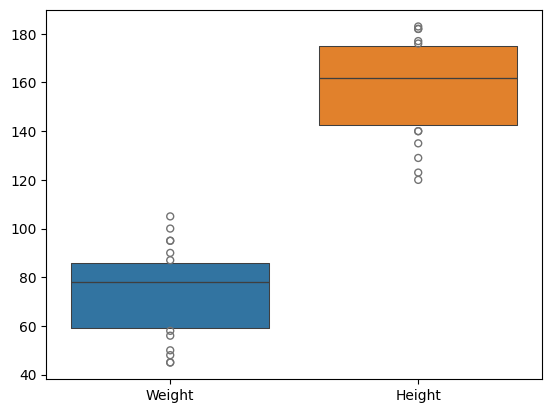

In [5]:
sns.boxenplot(df)

In [6]:
X = df[['Weight']]
y = df['Height']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Standard Scaler

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[-0.87662801],
        [ 1.66773133],
        [ 0.33497168],
        [-1.48242785],
        [ 1.36483141],
        [-1.6641678 ],
        [-0.75546804],
        [-0.1496682 ],
        [ 0.21381171],
        [-1.36126788],
        [-0.99778797],
        [-0.02850823],
        [ 1.06193149],
        [ 0.57729161],
        [ 0.75903157],
        [ 0.88019153],
        [ 0.45613165]]),
 array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812],
        [ 1.97063125]]))

## Linear Regression

MSE : 114.84069295228699
MAE : 9.66512588679501
RMSE : 10.716374991212605
r2_score : 0.7360826717981276
Adjusted r2_score : 0.6701033397476595


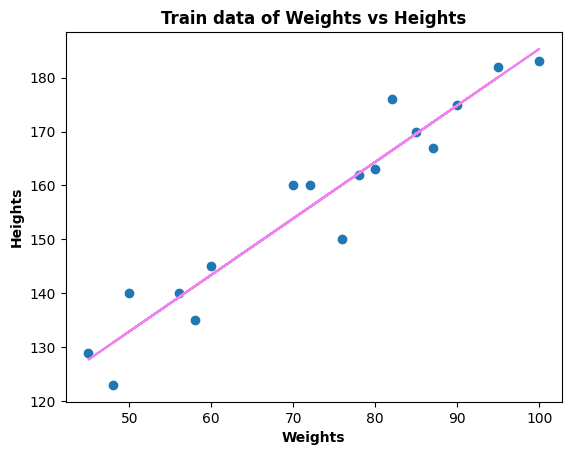

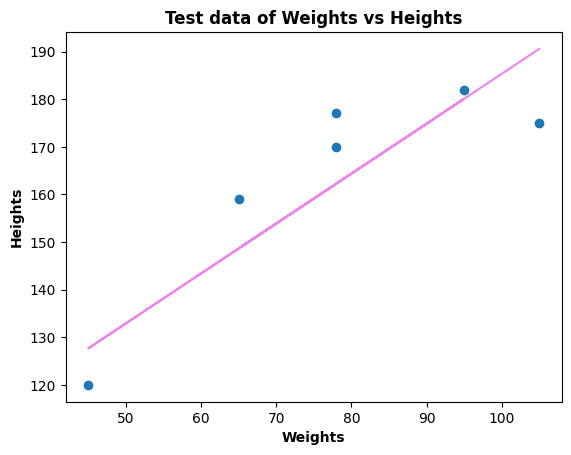

In [9]:
# creating model
linear_regression = LinearRegression(n_jobs=-1)
linear_regression.fit(X_train_scaled, y_train)
y_pred = linear_regression.predict(X_test_scaled)

# performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

print("MSE :", mse)
print("MAE :", mae)
print("RMSE :",rmse)
print("r2_score :", score)
# adjusted r2_score : Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
print("Adjusted r2_score :", 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# best fit line for train data 
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_regression.predict(X_train_scaled), color = 'violet')
plt.xlabel("Weights", weight='bold')
plt.ylabel("Heights", weight='bold')
plt.title("Train data of Weights vs Heights", weight='bold')
plt.show()

# best fit line for test data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'violet')
plt.xlabel("Weights", weight='bold')
plt.ylabel("Heights", weight='bold')
plt.title("Test data of Weights vs Heights", weight='bold')
plt.show()

* MSE: When you want to penalize large errors heavily (e.g., for tasks like predicting expensive items where large mistakes are costly).
* MAE: When you need a simple, intuitive metric for the average prediction error, without emphasizing large mistakes.
* RMSE: When you want an error metric in the same unit as the target variable and want to penalize larger errors more.
* R-squared: When you want to measure how well your model explains the variance in the data.
* Adjusted R-squared: When you’re building models with multiple predictors and want to avoid overfitting.

##### line equation y = mx + c

In [10]:
m = linear_regression.coef_
c = linear_regression.intercept_
m, c

(array([17.2982057]), 156.47058823529412)

In [11]:
new_data_point = scaler.transform([[50]])       # new weight

In [12]:
y = m*new_data_point + c # (taking the data point 50)
y

array([[132.92309646]])

##### the  predicted height is 132 and from the above plot we can see that for the data point 50 the given weight is 132

In [13]:
## OLS Linear Regression
import statsmodels.api as sm

In [14]:
model=sm.OLS(y_train,X_train_scaled).fit()

In [15]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 04 Oct 2024   Prob (F-statistic):                       0.664
Time:                        19:02:44   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------